## Outlier Handling

In [12]:
from importlib import reload
import pandas as pd
import outlier_detection as od

reload(od)

<module 'outlier_detection' from 'e:\\Ames-Housing-Price-Predictor\\notebooks\\outlier_detection.py'>

### Load dataset

In [13]:
df = pd.read_parquet('../data/processed/03_data_imputed.parquet')  # acá debemos importar los datos procesados
df = df.astype({col: 'int64' for col in df.select_dtypes(include='Int64').columns})

### Encoding categorical variables

In [14]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
target = 'saleprice'

In [15]:
df_encoded = od.category_encoding(df, cat_features, target)

### PCA Reconstruction Outliers

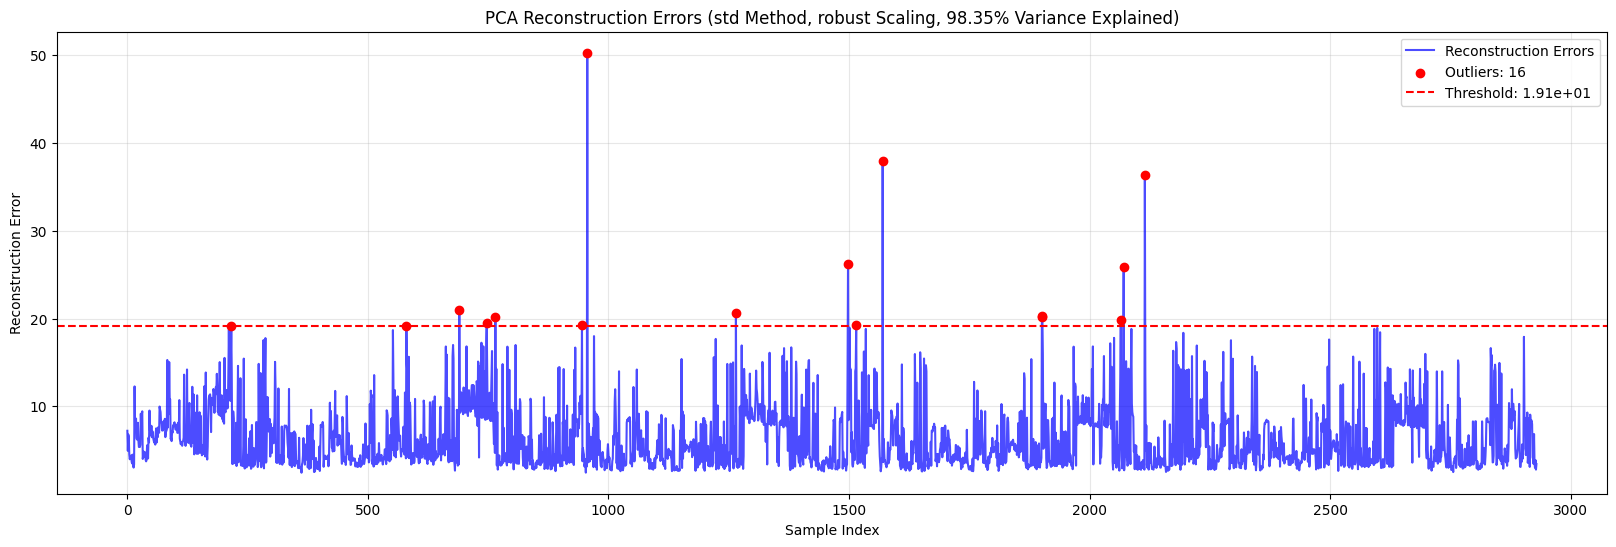

In [38]:
pca_outliers = od.pca_reconstruction_outliers(
    df=df_encoded,
    columns=df_encoded.columns,  # Excluir la columna de etiquetas
    var_explained=0.98,
    method='std',
    threshold_std=3.5,
    display_info=True
)

### Isolation Forest Outliers

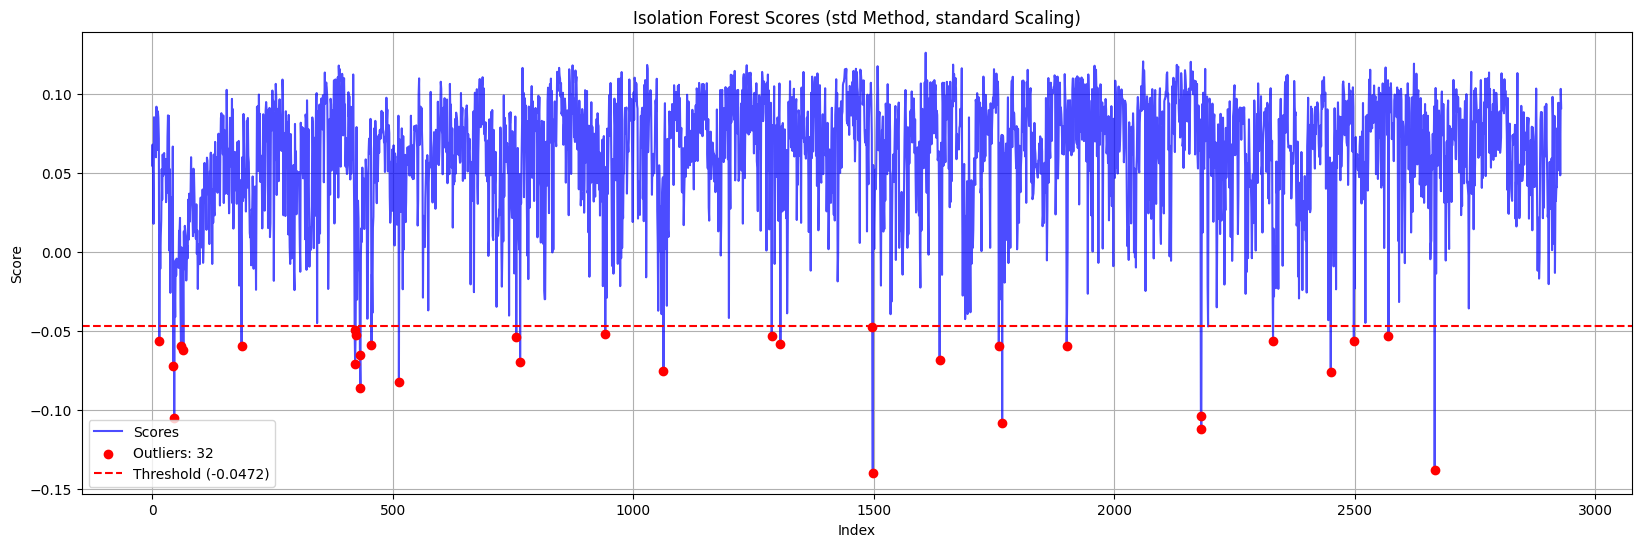

In [39]:
iso_outliers = od.isolation_forest_outliers(
    df=df_encoded,
    columns=df_encoded.columns,  # Excluir la columna de etiquetas
    method='std',
    threshold_std=3,    
    display_info=True
)

### Final Outliers

In [40]:
final_outliers = pca_outliers.intersection(iso_outliers)

In [41]:
df.iloc[pd.Index(final_outliers), :]

,1st_flr_sf,2nd_flr_sf,total_bsmt_sf,gr_liv_area,lot_area,totrms_abvgrd,overall_qual,overall_cond,exter_qual,exter_cond,...,exterior_2nd,sale_condition,bsmt_unf_sf,bsmtfin_type_1,exterior_1st,garage_type,central_air,condition_1,lot_shape,saleprice
765,904.0,0.0,683.0,904.0,10020.0,4,1,1,Fa,Fa,...,Wd Sdng,Normal,333.0,BLQ,Wd Sdng,Detchd,N,Norm,IR1,61000.0
1498,4692.0,950.0,6110.0,5642.0,63887.0,12,10,5,Ex,TA,...,Stucco,Partial,466.0,GLQ,Stucco,Attchd,Y,Feedr,IR3,160000.0
1901,334.0,0.0,0.0,334.0,5000.0,2,1,3,Fa,Fa,...,VinylSd,Normal,0.0,Unf,VinylSd,Detchd,N,Norm,Reg,39300.0


There are 3 outliers, so I don't need to remove them.

In [45]:
df.to_parquet('../data/processed/04_outlier_handling.parquet', index=False)